In [1]:
import numpy as np
import scipy
from scipy import stats
from matplotlib import pyplot as plt
from statsmodels.stats.weightstats import ztest, _tconfint_generic, _zconfint_generic
from statsmodels.stats.proportion import proportion_confint

## Доверительные интервалы

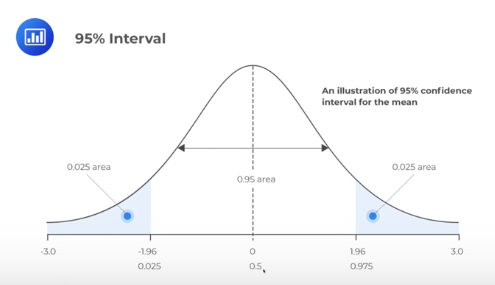

### Доверительные интервалы для среднего

#### Дисперсия известна - z-интервал

In [2]:
mean = 5.0  # среднее
var = 2.0  # дисперсия
n_samples = 20
std = np.sqrt(var / n_samples)  # стандартное отклонение
_zconfint_generic(mean, std, 0.05, 'two-sided')

(4.380204967695438, 5.619795032304562)

#### Дисперсия неизвестна - t-интервал

In [3]:
mean = 10.0
var = 2.5
n_samples = 20
std = np.sqrt(var / (n_samples - 1))
_tconfint_generic(mean, std, n_samples - 1, 0.05, 'two-sided')

(9.240780378808921, 10.759219621191079)

### Доверительные интервалы для доли

In [4]:
np.random.seed(1)

statistical_population = np.random.randint(2, size = 100_000)

random_sample = np.random.choice(statistical_population, size = 1000)

In [5]:
statistical_population

array([1, 1, 0, ..., 0, 0, 0])

In [15]:
random_sample

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,

In [6]:
# истинное значение доли
statistical_population.mean()

0.49771

In [7]:
random_sample.mean()

0.502

#### Доверительный интервал на основе нормального распределения

$\hat p \pm z_{1 - \frac {\alpha} {2}} \sqrt \frac {\hat p (1 - \hat p)} {n}$

In [8]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), 
                                     method = 'normal')

In [9]:
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1],
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.471010, 0.532990] with width 0.061979


### Z-тест для среднего

**используем при известной дисперсии**

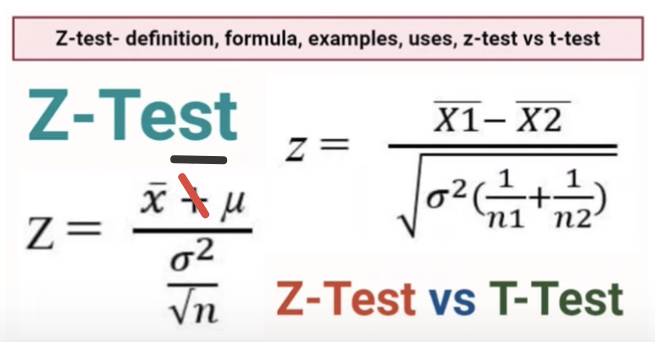

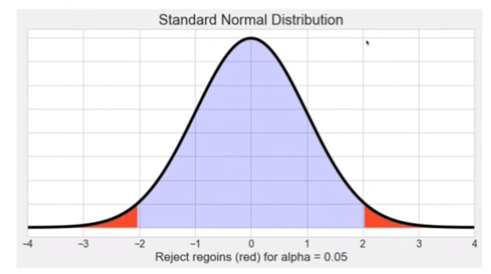

In [31]:
np.random.seed(42)
a1_norm = np.random.normal(size=10_000)
a2_norm = np.random.normal(size=10_000)

In [11]:
a1_norm

array([ 0.49671415, -0.1382643 ,  0.64768854, ..., -0.70531672,
        0.49576557,  0.64438845])

In [12]:
a2_norm

array([-0.67849473, -0.30549946, -0.59738106, ...,  0.37835397,
        1.71352973, -1.6199198 ])

#### Вопрос: односторонняя или двусторонняя гипотеза?

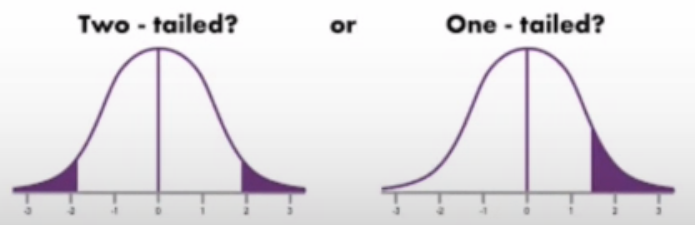

In [13]:
ztest(a1_norm, a2_norm, alternative='two-sided')

(-1.1055656789830124, 0.26891455185861357)

In [14]:
np.random.seed(42)
a1_norm_changed = np.random.normal(loc=0.13, size=1000)
a2_norm = np.random.normal(size=1000)

In [15]:
ztest(a1_norm_changed, a2_norm, alternative='two-sided')

(1.7758602825985244, 0.07575594873089467)

In [16]:
ztest(a1_norm_changed, a2_norm, alternative='larger')
# 1ая выборка должна быть меньше, а мы берём больше, чтобы увидеть ошибку

(1.7758602825985244, 0.037877974365447334)

### T-тест для среднего

**используем, когда дисперсия неизвестна**

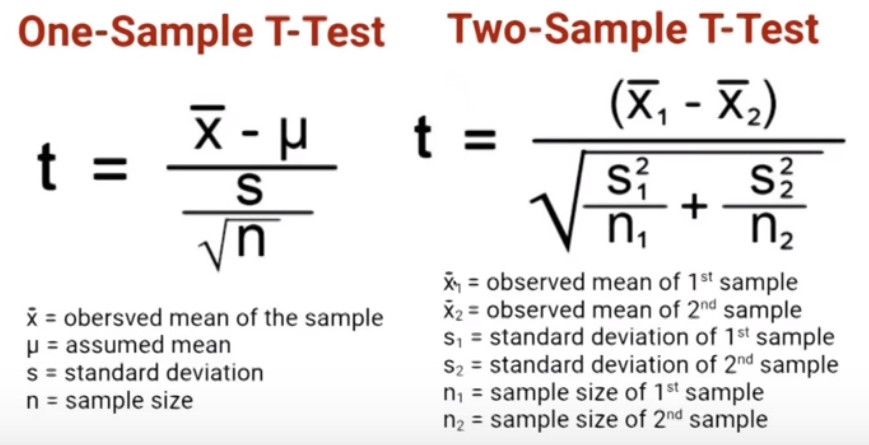

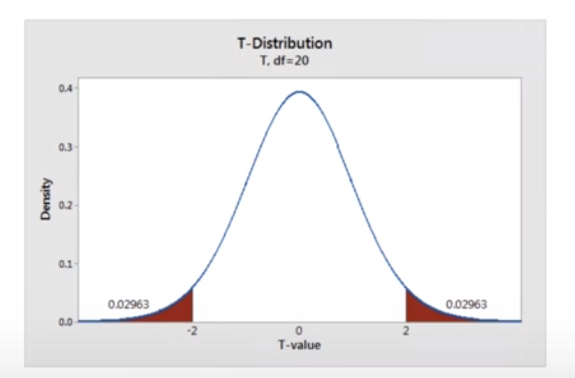

In [17]:
np.random.seed(42)
a1_norm_for_t = np.random.normal(size=1000)
a2_norm_for_t = np.random.normal(size=1000)

In [18]:
stats.ttest_ind(a1_norm_for_t, a2_norm_for_t)

TtestResult(statistic=-1.165211495926993, pvalue=0.2440724841245712, df=1998.0)

### Z-тест для доли

In [19]:
np.random.seed(42)
conv_arr1 = scipy.stats.bernoulli.rvs(p=0.5, size=1000)
conv_arr2 = scipy.stats.bernoulli.rvs(p=0.52, size=1000)

In [20]:
conv_arr1

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,

In [21]:
conv_arr2

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,

In [22]:
ztest(conv_arr1, conv_arr2)

(-0.2681987872851445, 0.7885463084183779)

In [23]:
np.random.seed(42)
conv_arr1 = scipy.stats.bernoulli.rvs(p=0.5, size=1000)
conv_arr2 = scipy.stats.bernoulli.rvs(p=0.6, size=1000)

In [24]:
ztest(conv_arr1, conv_arr2)

(-3.2791636297597635, 0.0010411524754583722)

## Критерий Шапиро-Уилка на нормальность выборки

In [25]:
stats.shapiro(a1_norm)

C:\Users\Raz0ne\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9999344944953918, pvalue=0.9986492395401001)

In [26]:
np.random.seed(42)
a_lognorm = scipy.stats.lognorm.rvs(loc=0, scale=1, size=1000, random_state=42, s=1)

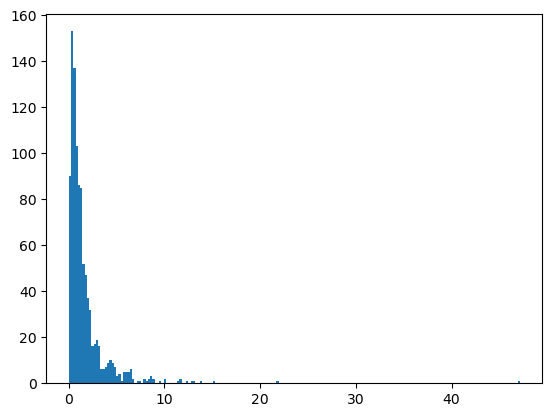

In [27]:
plt.hist(a_lognorm, bins=200)
plt.show()

In [28]:
stats.shapiro(a_lognorm)

ShapiroResult(statistic=0.49796491861343384, pvalue=0.0)

## Критерий Манна-Уитни на согласованность расппределений

In [34]:
np.random.seed(42)
a1_norm = np.random.normal(size=1000)
a2_norm = np.random.normal(size=1000)

stats.mannwhitneyu(a1_norm, a2_norm)

MannwhitneyuResult(statistic=482111.0, pvalue=0.16596351306565582)

In [35]:
a_lognorm = np.random.lognormal(size=1000)

stats.mannwhitneyu(a1_norm, a_lognorm)

MannwhitneyuResult(statistic=173207.0, pvalue=2.6809456696225e-141)

In [36]:
a1_norm_changed = np.random.normal(loc=0.13, size=1000)

stats.mannwhitneyu(a1_norm, a1_norm_changed)

MannwhitneyuResult(statistic=471801.0, pvalue=0.028984258544344003)

## Критерий Колмогорова-Смирнова на согласованность расппределений выборки и референсного распределения

In [38]:
stats.kstest(a1_norm, 'norm')

KstestResult(statistic=0.017327787320720822, pvalue=0.9196626608357358, statistic_location=-0.07444591576616721, statistic_sign=-1)

In [39]:
stats.kstest(a2_norm, 'norm')

KstestResult(statistic=0.041654345419119776, pvalue=0.06048270727276284, statistic_location=-0.32483138350862245, statistic_sign=-1)

In [40]:
stats.kstest(a1_norm_changed, 'norm')

KstestResult(statistic=0.06505839784685863, pvalue=0.0004009943297395554, statistic_location=0.2690603986534177, statistic_sign=-1)

In [41]:
stats.kstest(a_lognorm, 'norm')

KstestResult(statistic=0.5357816906756997, pvalue=7.533260620020958e-269, statistic_location=0.19111356695866868, statistic_sign=-1)